Phishing email dataset neural network 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 
import io
import matplotlib.pyplot as plt
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
df = pd.read_csv("Phishing.csv", usecols = ['id', #Represents an identifier for each record.
                                            'NumDots', #Indicates the number of dots (periods) in the URL.
                                            'SubdomainLevel', #Represents the level of the subdomain in the URL.
                                            'PathLevel', #Represents the level of the path in the URL.
                                            'UrlLength', #Represents the length of the URL.
                                            'NumDash', #Indicates the number of dashes in the URL.
                                            'NumDashInHostname', #The number of dashes in the hostname portion of the URL.
                                            'AtSymbol', #The presence of the "@" symbol in the URL.
                                            'TildeSymbol', #The presence of the "~" symbol in the URL.
                                            'NumUnderscore', #The number of underscores in the URL.
                                            'IframeOrFrame', #Indicates whether the page contains an iframe or frame.
                                            'MissingTitle', #Indicates whether the page has a missing title.
                                            'ImagesOnlyInForm', #Indicates whether there are images only in form elements.
                                            'SubdomainLevelRT', #Represents the subdomain level as a ratio.
                                            'UrlLengthRT', #Represents the URL length as a ratio.
                                            'PctExtResourceUrlsRT', #The percentage of external resource URLs as a ratio.
                                            'AbnormalExtFormActionR', #The abnormality of external form action as a ratio.
                                            'ExtMetaScriptLinkRT', #The ratio of external meta, script, and link elements.
                                            'PctExtNullSelfRedirectHyperlinksRT', #The percentage of external, null, or self-redirect hyperlinks as a ratio.
                                            'CLASS_LABEL' # Represents the class label, presumably indicating whether the URL is associated with phishing ("1") or not ("0").
                                            ])

In [3]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
#The purposepurpose of this code is to remove the columns 'id' and 'NumDots' from the DataFrame df which are are made directly to the DataFrame itself, where after this operation, the DataFrame df will no longer contain the columns 'id' and 'NumDots'.
df.drop(['id', 'NumDots'], axis=1, inplace=True)

In [5]:
#Identifies the categorical columns in a DataFrame df, extracts those columns, and then calculates the count of unique values in each of the identified categorical columns, helping to understand the variety and uniqueness of categorical data within the DataFrame.
app_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df[app_cat].nunique()

#The following output below indicates that there is an empty Pandas Series with no data points and if there were any data points, there would have been of the data type float64 (64-bit floating-point numbers).

Series([], dtype: float64)

In [6]:
app_type_counts = df['UrlLengthRT'].value_counts() #The variable app_type_counts will hold a Pandas Series that presents the count of occurrences for each unique value present in the 'UrlLengthRT' column of the DataFrame df.
app_type_counts

#The below output shows the distribution of unique values in the 'UrlLengthRT' column, along with the corresponding count of occurrences for each unique value. 
#This kind of information is helpful for understanding the frequency distribution of values within a specific column and can be valuable for various data analysis and decision-making tasks.

UrlLengthRT
 1    3465
 0    3272
-1    3263
Name: count, dtype: int64

<Axes: ylabel='Density'>

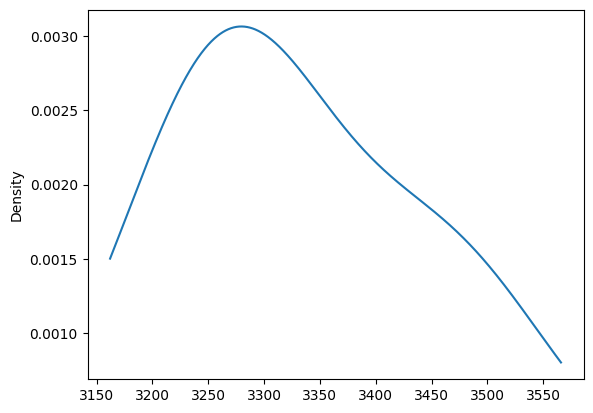

In [7]:
#The density plot represents the distribution of values as a smoothed curve allowing for the visulisation the overall shape of the distribution and any potential patterns or trends to understand the distribution of continuous data.
app_type_counts.plot.density()

#The below output indicates that the object being represented is an axis which is a fundamental component in a plot used to display data.
#The label that is assigned to the vertical axis of the plot, indicating that the axis represents the density values of the data being plotted.

In [8]:
replace_app = list(app_type_counts[app_type_counts < 500].index) #Creates a list called replace_app that contains the unique values from the app_type_counts Series which have a frequency (value count) of less than 500.
for app in replace_app: #The loop is designed to iterate over the values stored in the replace_app list, assigning each value to the loop variable app in each iteration.
    df.UrlLengthRT = df.UrlLengthRT.replace(app,"Other") #Useful for grouping or categorizing infrequent values in the column for further analysis or visualization.
    df.UrlLengthRT.value_counts() #Calculates and presents the distribution of unique values and their counts in the 'UrlLengthRT' column of the DataFrame df.

In [9]:
class_value_counts = df['ExtMetaScriptLinkRT'].value_counts()
class_value_counts #The variable class_value_counts will hold a Pandas Series that presents the count of occurrences for each unique value present in the 'ExtMetaScriptLinkRT' column of the DataFrame df.


#The output below shows the distribution of unique values in the 'ExtMetaScriptLinkRT' column, along with the corresponding count of occurrences for each unique value.
#Valuable for understanding the frequency distribution of values within a specific column and can be useful for various data analysis and decision-making tasks. 

ExtMetaScriptLinkRT
 0    3988
 1    3873
-1    2139
Name: count, dtype: int64

<Axes: ylabel='Density'>

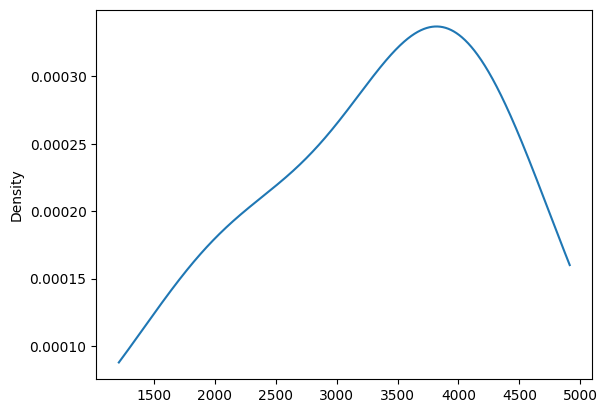

In [10]:
#A density plot shows the distribution of data points along a continuous axis often used to visualize the underlying probability density function of a dataset. 
#The exact appearance and features of the plot, as well as any additional customization, would depend on the library being used and any other settings applied to the plot.
class_value_counts.plot.density()

#The below output shows a textual and visual representation of the plotting axes including its properties. 

In [11]:
replace_class = list(class_value_counts[class_value_counts < 500].index) #To identify and potentially replace or manipulate certain data points that meet specific criteria.
for cls in replace_class: #This is the loop variable that will hold the value of each element in the replace_class list during each iteration of the loop which can be used to reference the current element being processed.
    df.CLASSIFICATION = df.CLASSIFICATION.replace(cls,"Other") #The overall purpose of this line of code is to find occurrences of a specific value within the CLASSIFICATION column of the DataFrame df and replace those occurrences with the value "Other". 
    df.CLASSIFICATION.value_counts() #Generates a count of unique values within the "CLASSIFICATION" column of the DataFrame df.

In [12]:
df.count()

SubdomainLevel                        10000
PathLevel                             10000
UrlLength                             10000
NumDash                               10000
NumDashInHostname                     10000
AtSymbol                              10000
TildeSymbol                           10000
NumUnderscore                         10000
IframeOrFrame                         10000
MissingTitle                          10000
ImagesOnlyInForm                      10000
SubdomainLevelRT                      10000
UrlLengthRT                           10000
PctExtResourceUrlsRT                  10000
AbnormalExtFormActionR                10000
ExtMetaScriptLinkRT                   10000
PctExtNullSelfRedirectHyperlinksRT    10000
CLASS_LABEL                           10000
dtype: int64

In [13]:
app_cat = df.dtypes[df.dtypes == "object"].index.tolist() #Identifying columns in the DataFrame df where the data type is "object" which often represents text or categorical data, and it's storing the names of those columns in the list app_cat.
app_cat

[]

In [14]:
enc = OneHotEncoder(sparse=False) #Initializes an instance of the OneHotEncoder class with the sparse parameter set to False.
encode_df = pd.DataFrame(enc.fit_transform(df[app_cat])) #Transforms categorical variables in the DataFrame df into a one-hot encoded representation, creating a new DataFrame called encode_df.
encode_df.head() #Displays the initial rows of the DataFrame encode_df, showing how the one-hot encoded representation of the categorical variables looks.

C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


""
0
1
2
3
4


In [15]:
application_df = df.merge(encode_df, left_index=True,right_index=True) #Merges the original DataFrame df with the one-hot encoded DataFrame encode_df where the resulting dataframe contains both the original data columns from df and the additional one-hot encoded columns from encode_df. 
application_df = df.drop(columns = app_cat) #Generates a new DataFrame named application_df by removing or dropping specific columns from the original DataFrame df. 
application_df.head() #Provides a quick overview of the structure and content of the merged DataFrame after performing the operation to drop specific columns.

,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,5,72,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,1,3,144,0,0,0,0,2,0,0,0,1,-1,1,1,1,1,1
2,1,2,58,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,1,6,79,1,0,0,0,0,0,0,0,1,-1,1,1,1,-1,1
4,0,4,46,0,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [16]:
y = application_df['UrlLength'].values #EXtracts the values from the column named 'UrlLength' in the DataFrame application_df and assigns them to the variable y. 
X = application_df.drop(['UrlLength'], axis=1).values #Drops the 'UrlLength' column from the DataFrame application_df using the drop function, specifying axis=1 to indicate that you're dropping a column. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78) #Uses the train_test_split function from scikit-learn to split the matrix X and target variable y into training and testing sets.

In [17]:
scaler = StandardScaler() #Creates an instance of the StandardScaler class, which is used for feature scaling.
X_scaler = scaler.fit(X_train) #Fits the scaler to the training data X_train, calculating the mean and standard deviation of each feature.
X_train_scaled = X_scaler.transform(X_train) #Transforms the training features using the fitted scaler which standardizes the features in X_train by subtracting the mean and dividing by the standard deviation.
X_test_scaled = X_scaler.transform(X_test) #Transforms the testing features using the same fitted scaler that was fitted to the training data.

In [18]:
number_input_features = len(X_train_scaled[0]) #Calculates the number of input features in the scaled training data, and is used to determine the input dimension of the first layer of the neural network.
hidden_nodes_layer1 = 90 #Defines the number of nodes (neurons) in the first hidden layer of the neural network.
hidden_nodes_layer2 = 45 #Defines the number of nodes in the second hidden layer of the neural network.
nn = tf.keras.models.Sequential() #To build a neural network by stacking layers on top of each other in sequence.
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")) #Adds layers to the neural network using the Dense layer class. 
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary() #Prints a summary of the neural network's architecture, showing the number of parameters in each layer and the total number of trainable parameters in the network.



#The below output represents the number of parameters that the model will learn during training, as these learned parameters help the model make predictions based on the input data.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                1620      
                                                                 
 dense_1 (Dense)             (None, 45)                4095      
                                                                 
 dense_2 (Dense)             (None, 1)                 46        
                                                                 
Total params: 5761 (22.50 KB)
Trainable params: 5761 (22.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#Configures the neural network model for binary classification by setting the loss function to "binary_crossentropy", the optimizer to "adam", and the metric for evaluation to "accuracy".
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100) #The code trains the neural network model nn using the scaled training data X_train_scaled and the target labels y_train, where the training process is repeated for 100 epochs.

#The below output represents the progression of the training process through the specified number of epochs. 

Epoch 1/100
235/235 [==============================] - 1s 750us/step - loss: -9211.5195 - accuracy: 0.0000e+00
Epoch 2/100
235/235 [==============================] - 0s 695us/step - loss: -155770.7500 - accuracy: 0.0000e+00
Epoch 3/100
235/235 [==============================] - 0s 686us/step - loss: -711033.6250 - accuracy: 0.0000e+00
Epoch 4/100
235/235 [==============================] - 0s 689us/step - loss: -1912966.2500 - accuracy: 0.0000e+00
Epoch 5/100
235/235 [==============================] - 0s 680us/step - loss: -3962352.7500 - accuracy: 0.0000e+00
Epoch 6/100
235/235 [==============================] - 0s 676us/step - loss: -6985968.0000 - accuracy: 0.0000e+00
Epoch 7/100
235/235 [==============================] - 0s 677us/step - loss: -11099636.0000 - accuracy: 0.0000e+00
Epoch 8/100
235/235 [==============================] - 0s 670us/step - loss: -16418544.0000 - accuracy: 0.0000e+00
Epoch 9/100
235/235 [==============================] - 0s 677us/step - loss: -23017990.0000

In [21]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2) #Uses the evaluate method to assess the performance of the trained neural network model nn using the testing data.
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}") #Prints out the calculated loss and accuracy metrics after the evaluation is completed.

79/79 - 0s - loss: -1.2179e+10 - accuracy: 0.0000e+00 - 143ms/epoch - 2ms/step
Loss: -12178896896.0, Accuracy: 0.0


In [22]:
nn.save("Trained_phish.txt")

INFO:tensorflow:Assets written to: Trained_phish.txt\assets


INFO:tensorflow:Assets written to: Trained_phish.txt\assets


Malicious DNS to TCP Neural network

In [23]:
df = pd.read_csv("Malicious DNS to TCP.csv", usecols = [
        "SourceIP",
        "DestinationIP",
        "SourcePort", #Port numbers associated with the source endpoints of the network flow.
        "DestinationPort", #Port numbers associated with the destination endpoints of the network flow.
        "Duration", #Duration of the network flow.
        "FlowBytesSent", #Number of bytes sent in the network flow.
        "FlowSentRate", #Rate at which bytes are sent in the network flow.
        "FlowBytesReceived", #Number of bytes received in the network flow.
        "FlowReceivedRate", #Rate at which bytes are received in the network flow.
        "PacketTimeCoefficientofVariation", #Calculates the coefficient of variation for the time intervals between packets in a data communication or networking context.
        "ResponseTimeTimeVariance", #Calculates the variance of response times in a system or application.
        "ResponseTimeTimeStandardDeviation", #Calculates the standard deviation of response times in a system or application. 
        "ResponseTimeTimeMean",#Calculates the mean (average) of response times in a system or application.
        "ResponseTimeTimeMedian", #Calculates the median of response times in a system or application.
        "ResponseTimeTimeMode", #Calculates the mode of response times in a system or application.
        "ResponseTimeTimeSkewFromMedian",#calculates the skewness of response times in relation to the median in a system or application, where skewness is a statistical measure that indicates the asymmetry of a probability distribution.
        "ResponseTimeTimeSkewFromMode", #Measurement of how the distribution of response times is skewed in relation to the mode which is the most frequently occurring value in a dataset.
        "ResponseTimeTimeCoefficientofVariation", #Useful for understanding how consistent or variable the system's response times are.
        "DoH" #DoH stands for DNS over HTTPS and is a protocol that enhances the security and privacy of DNS (Domain Name System) queries by encrypting the DNS traffic and sending it over the HTTPS protocol.
                                            ])
df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,192.168.20.209,1.1.1.1,39406,443,120.772871,42357,350.716180,71915,595.456574,0.489724,4.023502e-01,0.634311,0.163861,0.001734,0.000006,0.766785,0.258319,3.871039,True
1,1.1.1.1,192.168.20.209,443,39406,120.656643,78950,654.336123,46138,382.390881,0.617101,1.243765e-08,0.000112,0.000050,0.000034,0.000021,0.433249,0.260983,2.225769,True
2,1.1.1.1,192.168.20.209,443,39406,120.692061,78559,650.904453,46805,387.805127,0.617322,8.999716e-09,0.000095,0.000046,0.000031,0.000024,0.471856,0.231073,2.065863,True
3,1.1.1.1,192.168.20.209,443,39406,120.644016,78133,647.632619,46444,384.967291,0.608922,7.678121e-09,0.000088,0.000048,0.000035,0.000021,0.444360,0.307892,1.826318,True
4,1.1.1.1,192.168.20.209,443,39406,120.883686,79169,654.918812,47193,390.400074,0.615777,1.310879e-08,0.000114,0.000048,0.000030,0.000018,0.470369,0.261599,2.387701,True


In [24]:
df.drop(['SourceIP', 'DestinationIP'], axis=1, inplace=True)

In [25]:
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

application_df[app_cat].nunique()

Series([], dtype: float64)

In [26]:
app_type_counts = df['ResponseTimeTimeMedian'].value_counts()
app_type_counts

ResponseTimeTimeMedian
0.000036     383
0.000035     379
0.015314     356
0.000039     355
0.015313     353
            ... 
0.024993       1
15.088677      1
15.088406      1
15.086740      1
0.001937       1
Name: count, Length: 30260, dtype: int64

<Axes: ylabel='Density'>

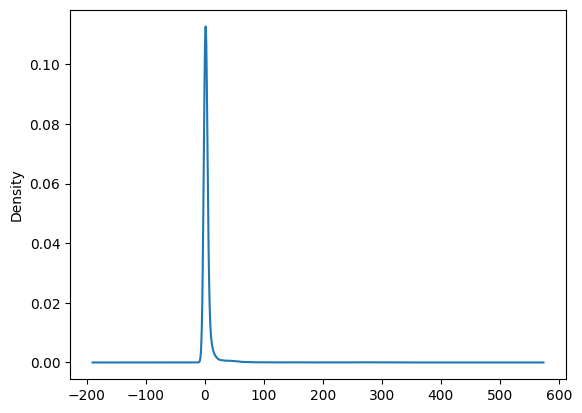

In [27]:
app_type_counts.plot.density()

In [28]:
replace_application = list(app_type_counts[app_type_counts < 10].index)
for app in replace_application:
    df['ResponseTimeTimeMedian'] = df['ResponseTimeTimeMedian'].replace(app, "Other")

In [29]:
class_value_counts = df['ResponseTimeTimeMean'].value_counts()
class_value_counts

ResponseTimeTimeMean
-1.000000    199
 0.010349     26
 0.010387     25
 0.010372     24
 0.010332     24
            ... 
 0.015079      1
 0.012644      1
 0.014976      1
 0.014813      1
 0.000075      1
Name: count, Length: 115279, dtype: int64

<Axes: ylabel='Density'>

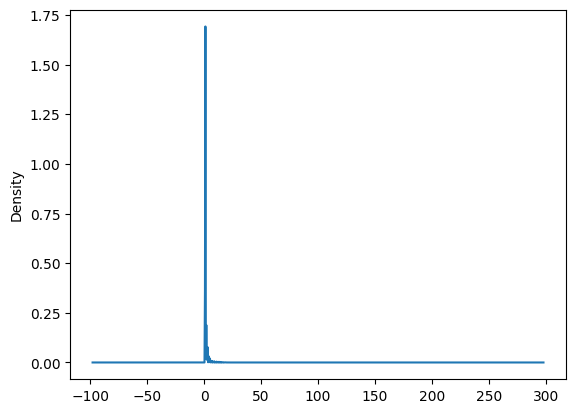

In [30]:
class_value_counts.plot.density()

In [31]:
replace_class = list(class_value_counts[class_value_counts < 10].index)
for cls in replace_class:
    df['ResponseTimeTimeMean'] = df['ResponseTimeTimeMean'].replace(cls, "Other")

In [32]:
df.ResponseTimeTimeMean.value_counts()

ResponseTimeTimeMean
Other                 152477
-1.0                     199
0.010349                  26
0.010387                  25
0.0103323333333333        24
                       ...  
0.0104756666666666        10
0.010347                  10
0.0109126666666666        10
0.0104421111111111        10
0.0103427777777777        10
Name: count, Length: 1129, dtype: int64

In [33]:
df.count()

SourcePort                                167517
DestinationPort                           167517
Duration                                  167517
FlowBytesSent                             167517
FlowSentRate                              167517
FlowBytesReceived                         167517
FlowReceivedRate                          167517
PacketTimeCoefficientofVariation          167517
ResponseTimeTimeVariance                  167517
ResponseTimeTimeStandardDeviation         167517
ResponseTimeTimeMean                      167517
ResponseTimeTimeMedian                    167318
ResponseTimeTimeMode                      167517
ResponseTimeTimeSkewFromMedian            167318
ResponseTimeTimeSkewFromMode              167517
ResponseTimeTimeCoefficientofVariation    167517
DoH                                       167517
dtype: int64

In [34]:
app_cat = ['ResponseTimeTimeMean', 'ResponseTimeTimeMedian']
app_cat

['ResponseTimeTimeMean', 'ResponseTimeTimeMedian']

In [35]:
df['ResponseTimeTimeMedian'] = df['ResponseTimeTimeMedian'].astype(str)
df['ResponseTimeTimeMean'] = df['ResponseTimeTimeMean'].astype(str)

In [36]:
enc = OneHotEncoder(sparse=False)
encoded_columns = ['ResponseTimeTimeMedian', 'ResponseTimeTimeMean']
encoded_features = enc.fit_transform(df[encoded_columns])
encoded_feature_names = enc.get_feature_names_out(encoded_columns)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
df = pd.concat([df, encoded_df], axis=1)

C:\Users\marty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
df = df.merge(encode_df, left_index=True,right_index=True)
df = df.drop(columns = app_cat)
df.head()

,SourcePort,DestinationPort,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,...,ResponseTimeTimeMean_0.010548,ResponseTimeTimeMean_0.0105583333333333,ResponseTimeTimeMean_0.0105652222222222,ResponseTimeTimeMean_0.0105704444444444,ResponseTimeTimeMean_0.0109126666666666,ResponseTimeTimeMean_0.010915,ResponseTimeTimeMean_0.011076,ResponseTimeTimeMean_0.0116685,ResponseTimeTimeMean_0.011678,ResponseTimeTimeMean_Other
0,39406,443,120.772871,42357,350.716180,71915,595.456574,0.489724,4.023502e-01,0.634311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,443,39406,120.656643,78950,654.336123,46138,382.390881,0.617101,1.243765e-08,0.000112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,443,39406,120.692061,78559,650.904453,46805,387.805127,0.617322,8.999716e-09,0.000095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,443,39406,120.644016,78133,647.632619,46444,384.967291,0.608922,7.678121e-09,0.000088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,443,39406,120.883686,79169,654.918812,47193,390.400074,0.615777,1.310879e-08,0.000114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
df.columns

Index(['SourcePort', 'DestinationPort', 'Duration', 'FlowBytesSent',
       'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate',
       'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance',
       'ResponseTimeTimeStandardDeviation',
       ...
       'ResponseTimeTimeMean_0.010548',
       'ResponseTimeTimeMean_0.0105583333333333',
       'ResponseTimeTimeMean_0.0105652222222222',
       'ResponseTimeTimeMean_0.0105704444444444',
       'ResponseTimeTimeMean_0.0109126666666666',
       'ResponseTimeTimeMean_0.010915', 'ResponseTimeTimeMean_0.011076',
       'ResponseTimeTimeMean_0.0116685', 'ResponseTimeTimeMean_0.011678',
       'ResponseTimeTimeMean_Other'],
      dtype='object', length=3492)

In [39]:
y = df['FlowReceivedRate'].values
X = df.drop(['FlowReceivedRate'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 45
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 90)                314280    
                                                                 
 dense_4 (Dense)             (None, 45)                4095      
                                                                 
 dense_5 (Dense)             (None, 1)                 46        
                                                                 
Total params: 318421 (1.21 MB)
Trainable params: 318421 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 2/100
235/235 [==============================] - 1s 2ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 3/100
235/235 [==============================] - 1s 2ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 8/100
235/235 [==============================] - 1s 2ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: nan - accuracy: 1.3333e-04
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: nan - 

In [44]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

79/79 - 0s - loss: nan - accuracy: 0.0000e+00 - 159ms/epoch - 2ms/step
Loss: nan, Accuracy: 0.0


In [45]:
nn.save("Trained_Phishv2.txt")

INFO:tensorflow:Assets written to: Trained_Phishv2.txt\assets


INFO:tensorflow:Assets written to: Trained_Phishv2.txt\assets
